In [49]:
#MACD SIGNAL

In [50]:
import pandas as pd
import pandas_datareader.data as reader
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [51]:
#GET DATA FROM Yahoo Finance

In [52]:
end = dt.datetime.now()
start = dt.datetime(end.year - 1,end.month,end.day)

In [53]:
start

datetime.datetime(2019, 10, 10, 0, 0)

In [54]:
end

datetime.datetime(2020, 10, 10, 4, 18, 8, 463901)

In [55]:
df = reader.get_data_yahoo('BTC-USD',start,end)
df = df.reset_index()

In [56]:
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,High,Low,Open,Close,Volume,Adj Close
2019-10-08,2019-10-08,8627.706055,8169.298828,8229.840820,8595.740234,1.938494e+10,8595.740234
2019-10-09,2019-10-09,8625.272461,8471.933594,8585.280273,8586.473633,1.761866e+10,8586.473633
2019-10-10,2019-10-10,8721.780273,8316.181641,8585.262695,8321.756836,1.960438e+10,8321.756836
2019-10-11,2019-10-11,8415.242188,8313.340820,8315.665039,8336.555664,1.453264e+10,8336.555664
2019-10-12,2019-10-12,8470.988281,8276.612305,8336.902344,8321.005859,1.380829e+10,8321.005859
...,...,...,...,...,...,...,...
2020-10-04,2020-10-04,10804.000977,10646.443359,10688.034180,10804.000977,1.938519e+10,10804.000977
2020-10-05,2020-10-05,10803.456055,10565.197266,10799.778320,10621.664062,2.226496e+10,10621.664062
2020-10-06,2020-10-06,10687.268555,10591.963867,10619.803711,10679.136719,1.763439e+10,10679.136719
2020-10-07,2020-10-07,10939.799805,10569.823242,10677.625000,10923.627930,2.196212e+10,10923.627930


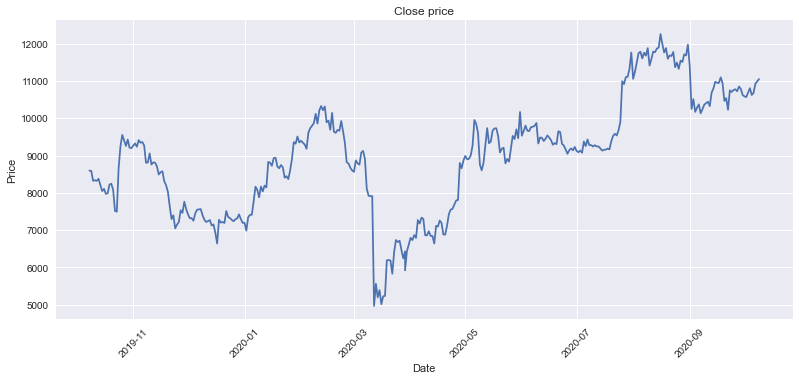

In [57]:
#Show Stock price (Close price)
plt.figure(figsize=(13.2, 5.5))
plt.plot(df['Close'], label='Close')
plt.title('Close price')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [58]:
#MACD Calculation and Signal Line Indicators
#Short Term EMA (Exponential Moving Average) Calculation
ShortEMA = df.Close.ewm(span=12, adjust=False).mean()
#Long term EMA (Exponential Moving Average) Calculation
LongEMA = df.Close.ewm(span=26, adjust=False).mean()
#MACD Line Calculation
MACD = ShortEMA - LongEMA
#Signal Line Calculation
signal = MACD.ewm(span=9, adjust=False).mean()

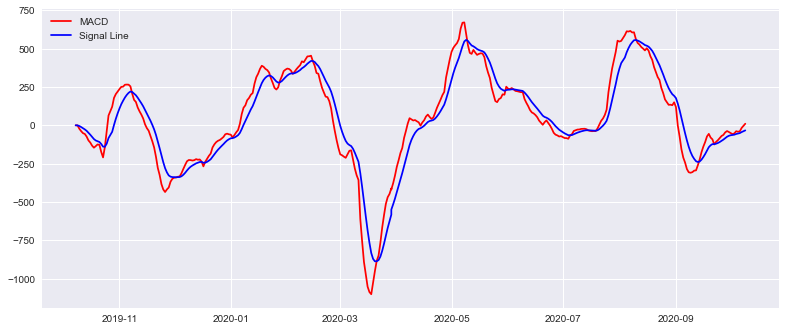

In [59]:
#Plot Chart
plt.figure(figsize=(13.2, 5.5))
plt.plot (df.index, MACD, label = 'MACD', color= 'red')
plt.plot (df.index, signal, label='Signal Line', color= 'blue')
plt.legend(loc='upper left')
plt.show()

In [60]:
#Data MACD and Signal Line added into Table
df['MACD'] = MACD
df['Signal Line'] = signal
df

,Date,High,Low,Open,Close,Volume,Adj Close,MACD,Signal Line
2019-10-08,2019-10-08,8627.706055,8169.298828,8229.840820,8595.740234,1.938494e+10,8595.740234,0.000000,0.000000
2019-10-09,2019-10-09,8625.272461,8471.933594,8585.280273,8586.473633,1.761866e+10,8586.473633,-0.739216,-0.147843
2019-10-10,2019-10-10,8721.780273,8316.181641,8585.262695,8321.756836,1.960438e+10,8321.756836,-22.426959,-4.603666
2019-10-11,2019-10-11,8415.242188,8313.340820,8315.665039,8336.555664,1.453264e+10,8336.555664,-37.982670,-11.279467
2019-10-12,2019-10-12,8470.988281,8276.612305,8336.902344,8321.005859,1.380829e+10,8321.005859,-50.977781,-19.219130
...,...,...,...,...,...,...,...,...,...
2020-10-04,2020-10-04,10804.000977,10646.443359,10688.034180,10804.000977,1.938519e+10,10804.000977,-38.493609,-56.590146
2020-10-05,2020-10-05,10803.456055,10565.197266,10799.778320,10621.664062,2.226496e+10,10621.664062,-41.645770,-53.601271
2020-10-06,2020-10-06,10687.268555,10591.963867,10619.803711,10679.136719,1.763439e+10,10679.136719,-39.056102,-50.692237
2020-10-07,2020-10-07,10939.799805,10569.823242,10677.625000,10923.627930,2.196212e+10,10923.627930,-17.078504,-43.969490


In [61]:
#Signal Buy/Sell
def buy_Sell(signal) :
    Buy = []
    Sell = []
    flag = -1
    
    for i in range(0, len(signal)):
        if signal['MACD'][i] < signal['Signal Line'][i]:
            Sell.append(np.nan)
            if flag != 1:
                Buy.append(signal['Close'][i])
                flag = 1
            else:
                Buy.append(np.nan)          
        elif signal['MACD'][i] > signal['Signal Line'][i]:
            Buy.append(np.nan)
            if flag != 0:
                Sell.append(signal['Close'][i])
                flag = 0
            else:
                Sell.append(np.nan)       
        else:
                Buy.append(np.nan)
                Sell.append(np.nan)  
                
                    
    return (Buy, Sell)


In [62]:
#BUY and SELL SIGNAL added into Table
a=buy_Sell(df)
df['Buy_Signal_Price'] =a[0]
df['Sell_Signal_Price'] =a[1]

In [63]:
df

,Date,High,Low,Open,Close,Volume,Adj Close,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
2019-10-08,2019-10-08,8627.706055,8169.298828,8229.840820,8595.740234,1.938494e+10,8595.740234,0.000000,0.000000,NaN,NaN
2019-10-09,2019-10-09,8625.272461,8471.933594,8585.280273,8586.473633,1.761866e+10,8586.473633,-0.739216,-0.147843,8586.473633,NaN
2019-10-10,2019-10-10,8721.780273,8316.181641,8585.262695,8321.756836,1.960438e+10,8321.756836,-22.426959,-4.603666,NaN,NaN
2019-10-11,2019-10-11,8415.242188,8313.340820,8315.665039,8336.555664,1.453264e+10,8336.555664,-37.982670,-11.279467,NaN,NaN
2019-10-12,2019-10-12,8470.988281,8276.612305,8336.902344,8321.005859,1.380829e+10,8321.005859,-50.977781,-19.219130,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-10-04,2020-10-04,10804.000977,10646.443359,10688.034180,10804.000977,1.938519e+10,10804.000977,-38.493609,-56.590146,NaN,NaN
2020-10-05,2020-10-05,10803.456055,10565.197266,10799.778320,10621.664062,2.226496e+10,10621.664062,-41.645770,-53.601271,NaN,NaN
2020-10-06,2020-10-06,10687.268555,10591.963867,10619.803711,10679.136719,1.763439e+10,10679.136719,-39.056102,-50.692237,NaN,NaN
2020-10-07,2020-10-07,10939.799805,10569.823242,10677.625000,10923.627930,2.196212e+10,10923.627930,-17.078504,-43.969490,NaN,NaN


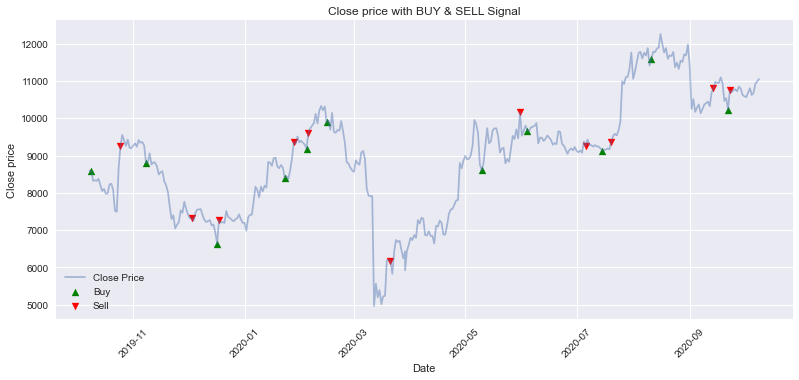

In [64]:
#Visual Stock Buy and sell Signal
plt.figure(figsize=(13.2, 5.5))
plt.scatter(df.index, df['Buy_Signal_Price'], color='green', label='Buy', marker='^', alpha =1)
plt.scatter(df.index, df['Sell_Signal_Price'], color='red', label='Sell', marker='v', alpha =1)
plt.plot(df['Close'], label='Close Price', alpha =0.45)
plt.title('Close price with BUY & SELL Signal')
plt.xticks(rotation =45)         
plt.xlabel('Date')
plt.ylabel('Close price')
plt.legend(loc = 'lower left') 
plt.show()